In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [2]:
# df = pd.read_csv('../data_saveecobot_14028.csv', index_col=0)
df = pd.read_csv('../data_saveecobot_4238.csv', index_col=0)
df_grouped = df.groupby('indicator_code')
df_temp = pd.DataFrame()
df_tt = pd.DataFrame()
for label, data in df_grouped:
    print(label)
    if label == 'humidity':
    # if label == 'pressure_pa':
        df_temp = data['value'].values
        df_tt = data 
        break
# df_temp, len(df_temp)
df_tt = df_tt[['value', 'datetime']]
df_tt

d:\Python3.9.2\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


formaldehyde_ppb
formaldehyde_ug
humidity


,value,datetime
id,,
4238,47.25,2020-08-02 20:05:26
4238,47.22,2020-08-02 20:06:30
4238,47.62,2020-08-02 20:07:32
4238,48.20,2020-08-02 20:08:35
4238,48.52,2020-08-02 20:10:42
...,...,...
4238,50.11,2021-10-12 12:21:24
4238,50.23,2021-10-12 12:26:37
4238,53.02,2021-10-12 12:31:48


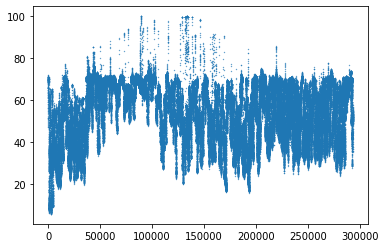

In [3]:
plt.scatter(range(len(df_temp)), df_temp, s=0.1)

In [4]:
window = 20
k = 5

df = pd.DataFrame()
# df['temperature'] = df_temp
df['humidity'] = df_temp
# df['pressure'] = df_temp
df['diff'] = df['humidity'].diff().fillna(0)
# df['diff'] = df['pressure'].diff().fillna(0)
df

,humidity,diff
0,47.25,0.00
1,47.22,-0.03
2,47.62,0.40
3,48.20,0.58
4,48.52,0.32
...,...,...
292987,50.11,-1.64
292988,50.23,0.12
292989,53.02,2.79
292990,52.76,-0.26


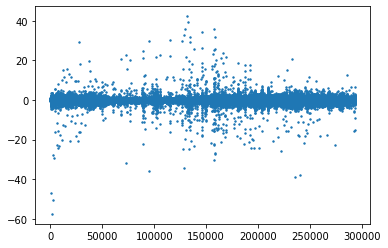

In [5]:
plt.scatter(range(len(df)), df['diff'], s=2)

In [6]:
window = 20
m = 3

arrNew = df['diff'].values
idxNew = df.index
cnt = 0
idx_ab_new, val_ab_new = [], []
valNew = [arrNew[t] for t in range(m * window)]
for i in range(m*window, len(arrNew), window):
    curr = arrNew[i:i+window]
    curr_mu = curr.mean()
    curr_sigma = curr.std(ddof=0)

    mean = np.array(valNew[-m*window:]).mean()
    var = np.array(valNew[-m*window:]).std(ddof=0)

    t = (curr_mu - mean) / np.sqrt(curr_sigma**2/window + var**2/(m*window))
    print(curr_mu, mean, curr_sigma, var, t)
    # if abs(curr_mu - mean) < var and curr_sigma < 2*var:
    if abs(t) <= 2.871 and curr_sigma < 10 * var:
        valNew.extend(curr)
    else:
        cnt += 1
        idx_ab_new.extend(idxNew[i:i+window])
        val_ab_new.extend(arrNew[i:i+window])

len(idx_ab_new), len(valNew), cnt

0.12699999999999995 0.2646666666666667 0.16288339387426867 0.26184898107284826 -2.7703971488129966
0.1335000000000001 0.191 0.2458103944099992 0.21183090740808655 -0.9366001345356634
0.050499999999999545 0.14366666666666675 0.3203977996179117 0.21240658077271368 -1.2145045000432337
0.019000000000000482 0.10366666666666653 0.4930101418835103 0.2542109797436411 -0.7360926462061504
-0.07600000000000051 0.06766666666666671 0.6857725570478899 0.37109462704574625 -0.8942669288385441
0.010500000000000398 -0.002166666666666828 0.4211469458514434 0.5242998241040668 0.10922080057915894
0.09399999999999978 -0.015499999999999877 0.2237051631053701 0.5465754751175721 1.2659780877140725
-0.0865000000000002 0.009499999999999887 0.34304919472285667 0.4872180381170906 -0.9677490926290208
-1.2309999999999994 0.005999999999999991 0.9675014211875868 0.3470888454944446 -5.599016682353847
-0.8835000000000001 0.005999999999999991 1.1371203762135302 0.3470888454944446 -3.445191416888744
-0.284 0.0059999999999

(8700, 284292, 435)

284292 284292
-2.3984999999999994 0.005999999999999991 9.35615961546189 0.3470888454944446
-2.5025000000000004 0.008999999999999985 10.592469435877549 0.24239568202974765
-2.534 0.1056666666666666 11.034061990037939 0.571668221572229
-2.764 0.1495 11.580279098536442 0.2211441837354086
-2.0020000000000002 0.17966666666666656 8.513399790917845 0.48784549011159556
-1.4905 0.12533333333333327 6.098465770175314 0.35907968784410804
-0.9494999999999998 0.0053333333333332195 3.384861112364877 0.2991569636309485
-0.6645 0.031333333333333255 2.628601291561731 0.1744368717393838
-1.1780000000000002 0.02950000000000005 4.6657642460801645 0.18135990920450668
-0.9245000000000001 0.018833333333333376 4.03824897077929 0.22891113025703966
-1.1269999999999998 0.03583333333333331 4.731166980777576 0.345312861362305
-0.8265 0.035000000000000024 3.2544097391078455 0.12949259953114434
-1.225 0.22099999999999997 5.511543794618708 0.3362077730610438
0.5474999999999998 0.018499999999999992 2.222489313810079 0.

(1940,
 282352,
 array([   260,    261,    262, ..., 292257, 292258, 292259]),
 array([-43.04,  -2.53,  -0.15, ...,   0.11,   0.38,   0.53]),
 97)

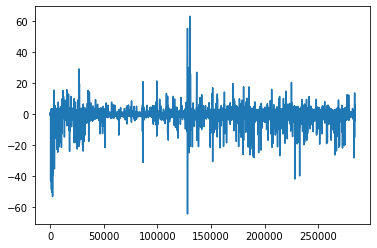

In [10]:
# 去除上述异常值后，测试当前表中是否仍有异常值

df_norm = df.drop(index=list(idx_ab_new))
# df_norm = df
# df_norm['diff'] = df_norm['temperature'].diff().fillna(0)
df_norm['diff'] = df_norm['humidity'].diff().fillna(0)
# df_norm['diff'] = df_norm['pressure'].diff().fillna(0)
plt.plot(range(len(df_norm)), df_norm['diff'])
arrNorm = df_norm['diff'].values
idxNorm = df_norm.index
print(len(arrNorm), len(idxNorm))
cnt = 0
idx_ab_norm = []
val_ab_norm = []
valNorm = [arrNorm[t] for t in range(m*window)]
for i in range(m*window, len(arrNorm), window):
    curr = arrNorm[i:i+window]
    curr_mu = curr.mean()
    curr_sigma = curr.std(ddof=0)

    mean = np.array(valNorm[-m*window:]).mean()
    var = np.array(valNorm[-m*window:]).std(ddof=0)

    t = (curr_mu - mean) / np.sqrt(curr_sigma**2/window + var**2/(m*window))

    if abs(t) <= 2.871 and curr_sigma < 10 * var:
        valNorm.extend(curr)
    else:
        cnt += 1
        idx_ab_norm.extend(idxNorm[i:i+window])
        val_ab_norm.extend(arrNorm[i:i+window])
        print(curr_mu, mean, curr_sigma, var)


len(idx_ab_norm), len(valNorm), np.array(idx_ab_norm), np.array(val_ab_norm), cnt

In [12]:
# df_norm['diff'] = df_norm['temperature'].diff().fillna(0)
df_norm['diff'] = df_norm['humidity'].diff().fillna(0)
# df_norm['diff'] = df_norm['pressure'].diff().fillna(0)
df_norm['mae'] = df_norm['diff'].rolling(window).mean().shift().fillna(0)
df_norm['vol'] = df_norm['diff'].rolling(window).std(ddof=0).shift().fillna(0)
df_norm['err'] = (k+1) * df_norm['vol']
df_norm['inserted'] = False

In [16]:
# 随机插入新的异常值
df_insert = df_norm.T
# col_n = np.array(range(m * window+3 * window, len(df_norm), np.random.randint(900, 1100))).astype('int64')
col_n = np.array(range(m * window+window, len(df_norm), np.random.randint(190, 210))).astype('int64')
# col_n = np.array(range(m * window+3 * window, len(df_norm), np.random.randint(90, 110))).astype('int64')
# col_n = np.array(range(m * window+3 * window, len(df_norm), np.random.randint(40, 60))).astype('int64')
print(df_insert.values.shape[1])
for obj in col_n.flatten():
    df_insert.insert(int(obj), obj+1e9, None)
total = df_insert.values.shape[1]
total, len(col_n), len(col_n)/total

284292


(285728, 1436, 0.005025758763579348)

In [18]:
# 给插入的列赋值为固定异常值-10000
df_inserted = df_insert.T
# idx_na = df_inserted.index[df_inserted['temperature'].isna()==True]
idx_na = df_inserted.index[df_inserted['humidity'].isna()==True]
df_inserted = df_inserted.fillna(method='ffill')
print(df_inserted.loc[idx_na, 'diff'])
df_inserted.loc[idx_na, 'diff'] = -10000
# df_inserted.loc[idx_na, 'temperature'] = df_inserted.loc[idx_na, 'temperature'] + 
print(df_inserted.loc[idx_na, 'diff'])

1000000080   -0.16
1000000278    0.69
1000000476    0.47
1000000674    0.74
1000000872   -0.03
              ... 
1000283418   -0.10
1000283616   -0.22
1000283814   -1.05
1000284012    0.32
1000284210   -0.17
Name: diff, Length: 1436, dtype: float64
1000000080   -10000.0
1000000278   -10000.0
1000000476   -10000.0
1000000674   -10000.0
1000000872   -10000.0
               ...   
1000283418   -10000.0
1000283616   -10000.0
1000283814   -10000.0
1000284012   -10000.0
1000284210   -10000.0
Name: diff, Length: 1436, dtype: float64


285728 285728
-499.869 0.191 2179.479539009026 0.21183090740808655 -1.0260873121814087
-2.395 -0.0071666666666665435 9.356923372562155 0.373207233167966 -1.1409610404915136
-500.16700000000003 -0.032333333333333235 2179.4113066011655 0.43090357261095985 -1.0262726470192602
-499.756 0.24833333333333332 2179.5055961442267 0.7019049476642514 -1.0259608060006444
-499.92700000000013 0.02233333333333339 2179.4664788248065 1.1074691367658465 -1.025866336914936
-499.99950000000007 0.09033333333333324 2179.44959225139 0.2170634827776329 -1.0261626277724991
-2.4549999999999996 0.01799999999999997 10.60219859274481 0.21478516398174846 -1.0430700486518012
-500.01449999999994 -0.010833333333333339 2179.4462226801447 0.5011928825866899 -1.025987396409943
-500.0765 0.06783333333333334 2179.4324621613655 1.218532028941199 -1.0262824740340304
-499.82199999999983 0.17366666666666658 2179.4903490463084 1.046352341337382 -1.0259501783643257
-2.5534999999999997 0.1495 11.021763595269134 0.5462735120798001 

(32760,
 252948,
 array([    80,     81,     82, ..., 292917, 292918, 292919]),
 array([-0.01,  0.16,  0.09, ...,  0.09, -0.11, -0.76]),
 1639)

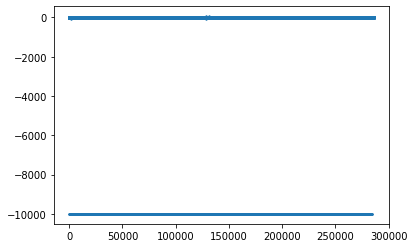

In [19]:
# 检测新插入的异常值

df_find = df_inserted.reset_index()
# df_find['diff'] = df_find['temperature'].diff().fillna(0)
plt.scatter(range(len(df_find)), df_find['diff'], s=2)
arrFind = df_find['diff'].values
idxFind = df_find.index
print(len(arrFind), len(idxFind))
cnt = 0
idx_ab_find = []
val_ab_find = []
valFind = [arrFind[t] for t in range(m*window)]
for i in range(m*window, len(arrFind), window):
    curr = arrFind[i:i+window]
    curr_mu = curr.mean()
    curr_sigma = curr.std(ddof=0)

    mean = np.array(valFind[-m*window:]).mean()
    var = np.array(valFind[-m*window:]).std(ddof=0)

    t = (curr_mu - mean) / np.sqrt(curr_sigma**2/window + var**2/(m*window))

    if abs(t) <= 2.871 and curr_sigma < 10 * var:
        valFind.extend(curr)
    else:
        cnt += 1
        idx_ab_find.extend(idxNorm[i:i+window])
        val_ab_find.extend(arrNorm[i:i+window])
        print(curr_mu, mean, curr_sigma, var, t)


len(idx_ab_find), len(valFind), np.array(idx_ab_find), np.array(val_ab_find), cnt

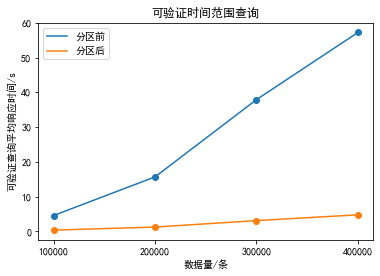

In [28]:
import numpy as np
import matplotlib.pyplot as plt

bftime = [4.58, 15.68, 37.89, 57.21]
aftime = [0.38, 1.26, 3.12, 4.78]
num = [1e5, 2e5, 3e5, 4e5]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(num, bftime, label='分区前')
plt.plot(num, aftime, label='分区后')
plt.scatter(num, bftime)
plt.scatter(num, aftime)
plt.ylabel('可验证查询平均响应时间/s')
plt.xlabel('数据量/条')
plt.title('可验证时间范围查询')
plt.xticks(num)
plt.legend()


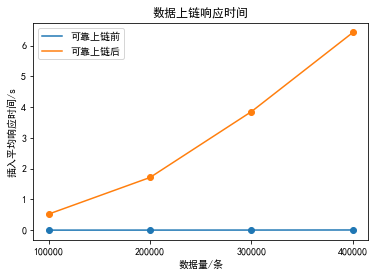

In [29]:
bfrelia = [16e-4, 24e-4, 36e-4, 61e-4]
afrelia = [0.5218, 1.7121, 3.8527, 6.4243]
num = [1e5, 2e5, 3e5, 4e5]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(num, bfrelia, label='可靠上链前')
plt.plot(num, afrelia, label='可靠上链后')
plt.scatter(num, bfrelia)
plt.scatter(num, afrelia)
plt.ylabel('插入平均响应时间/s')
plt.xlabel('数据量/条')
plt.title('数据上链响应时间')
plt.xticks(num)
plt.legend()

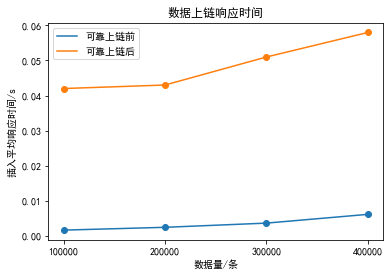

In [30]:
bfrelia = [16e-4, 24e-4, 36e-4, 61e-4]
afrelia = [0.042, 0.043, 0.051, 0.058]
num = [1e5, 2e5, 3e5, 4e5]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(num, bfrelia, label='可靠上链前')
plt.plot(num, afrelia, label='可靠上链后')
plt.scatter(num, bfrelia)
plt.scatter(num, afrelia)
plt.ylabel('插入平均响应时间/s')
plt.xlabel('数据量/条')
plt.title('数据上链响应时间')
plt.xticks(num)
plt.legend()